In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np

import math
pi = math.pi


Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2.mplstyle, line 35 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_modern.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_serif.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an

Welcome to JupyROOT 6.24/06


# MC15ri

# D0 -> (eta -> gg) (eta -> gg)

In [2]:
file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dtoetaeta_gg/pre_cut_study/'
file += 'pre_cut_study_Dtoetaeta_gg_mdst_50000_*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter=' D0_M>0'
# base_filter+=' && Eta_1_p>0.4 && Eta_2_p>0.4'
# base_filter+= ' && abs(Eta_1_daughterDiffOfPhi_0_1)<2.5 && abs(Eta_2_daughterDiffOfPhi_0_1)<2.5 && Eta_1_daughterAngle_0_1<2 && Eta_2_daughterAngle_0_1<2'
# base_filter+= ' && gamma1_p>0.1 && gamma2_p>0.1 && gamma3_p>0.1 && gamma4_p>0.1'
# base_filter+= ' && Eta_1_M>0.48 && Eta_1_M<0.60 && Eta_2_M>0.48 && Eta_2_M<0.60'


# tight cuts
# base_filter+= ' && abs(Eta_1_daughterDiffOfPhi_0_1)<2.5 && abs(Eta_2_daughterDiffOfPhi_0_1)<2.5 && Eta_1_daughterAngle_0_1<2 && Eta_2_daughterAngle_0_1<2'
# base_filter+= ' && gamma1_p>0.1 && gamma2_p>0.1 && gamma3_p>0.1 && gamma4_p>0.1'
# base_filter+= ' && Eta_1_M>0.51 && Eta_1_M<0.57 && Eta_2_M>0.51 && Eta_2_M<0.57 '
# base_filter+= ' && abs(Dstarp_delM-0.1455)<0.002'
tree = 'etaeta_gg_tag'
variables = ['D0_M','Dstarp_isSignal','Dstarp_delM',\
             'Eta_1_M','Eta_2_M','Eta_1_isSignal','Eta_2_isSignal','Eta_1_daughterDiffOfPhi_0_1','Eta_1_daughterAngle_0_1','Eta_1_Easym',
             'Eta_2_daughterDiffOfPhi_0_1','Eta_2_daughterAngle_0_1','Eta_2_Easym',\
             'Eta_1_p','Eta_2_p',\
             'gamma1_p','gamma2_p','gamma3_p','gamma4_p',\
             'gamma1_clusterReg', 'gamma2_clusterReg', 'gamma3_clusterReg', 'gamma4_clusterReg',\
             'gamma1_clusterNHits',\
             'gamma1_thetaInCDCAcceptance']

D0etaeta_gg   = get_pd(file=file , tree=tree, variables=variables ,base_filter=base_filter)
D0etaeta_gg_true = D0etaeta_gg.query('Dstarp_isSignal==1')
D0etaeta_gg_false = D0etaeta_gg.query('Dstarp_isSignal!=1')


input_line_79:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## delM

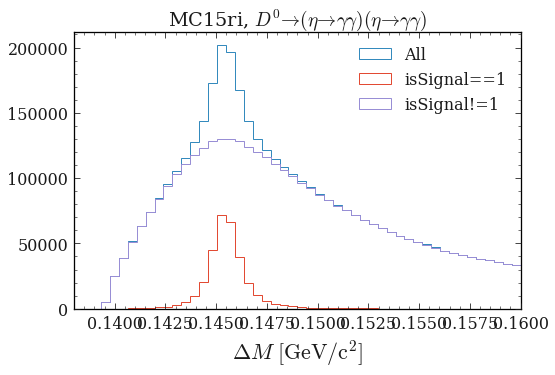

In [5]:
xrange = (0.138,0.160,51)
xm = np.linspace(*xrange)
var = 'Dstarp_delM'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'
file_path=img_path + '/mc15ri_etaeta_gg_1M_D0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$\Delta M\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
# plt.axvline(x=0.1455-0.002,  color='red', linestyle='dotted')
# plt.axvline(x=0.1455+0.002,  color='red', linestyle='dotted')
# 
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)

## D0M

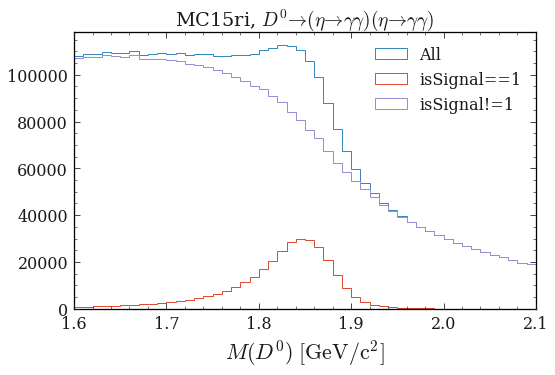

In [6]:
xrange = (1.60,2.1,51)
xm = np.linspace(*xrange)
var = 'D0_M'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'
file_path=img_path + '/mc15ri_etaeta_gg_1M_D0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(D^0)\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



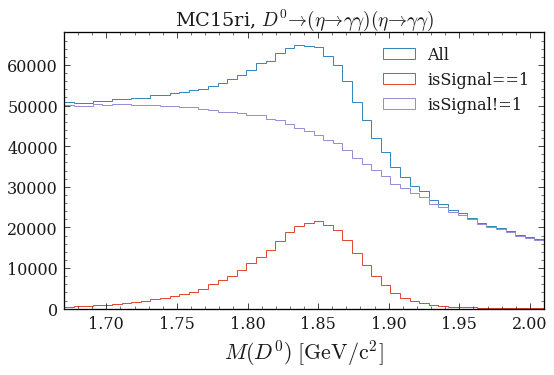

In [9]:
xrange = (1.67,2.01,51)
xm = np.linspace(*xrange)
var = 'D0_M'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'
file_path=img_path + '/mc15ri_etaeta_gg_1M_D0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(D^0)\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



## EtaM

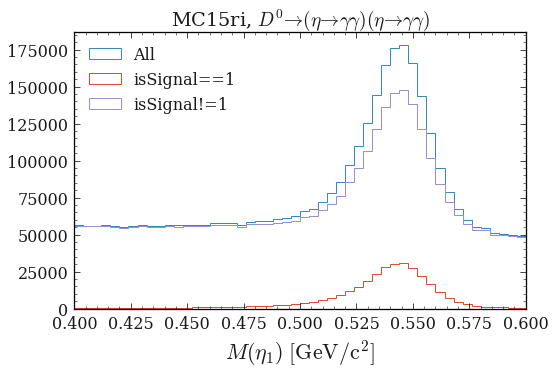

In [11]:
xrange = (0.4,0.6,51)
xm = np.linspace(*xrange)
var = 'Eta_1_M'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etaeta_gg_1M_Eta1M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(\eta_1)\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig(file_path)



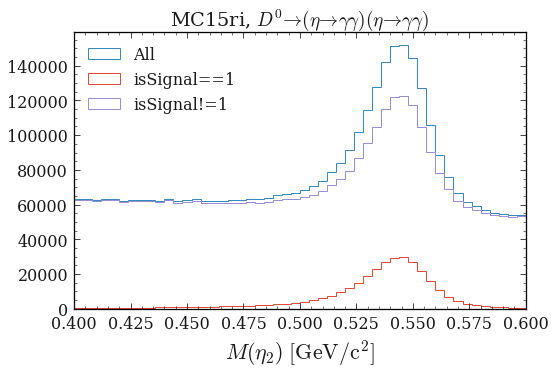

In [13]:
xrange = (0.4,0.6,51)
xm = np.linspace(*xrange)
var = 'Eta_2_M'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etaeta_gg_1M_Eta2M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(\eta_2)\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig(file_path)



## Etap

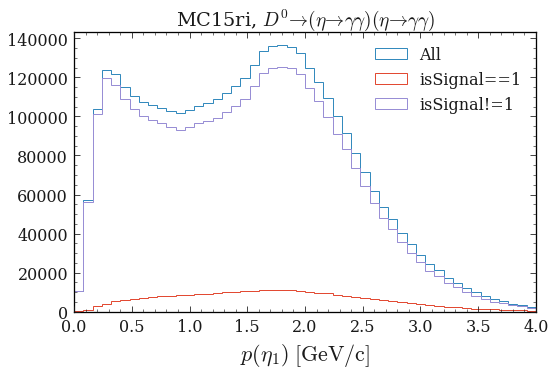

In [14]:
xrange = (0,4,51)
xm = np.linspace(*xrange)
var = 'Eta_1_p'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etaeta_gg_1M_Eta1M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$p(\eta_1)\; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
# plt.axvline(x=0.4,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



## diffofPhi , daughterAngle 2d

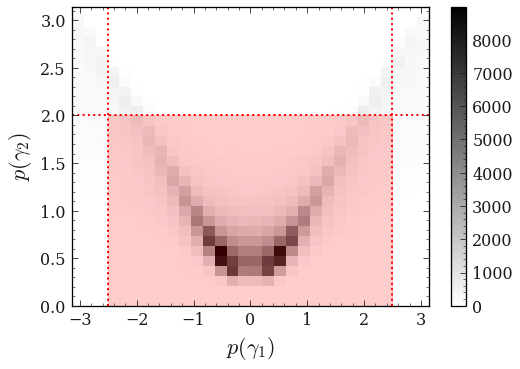

In [17]:
xvar = 'Eta_1_daughterDiffOfPhi_0_1'
yvar = 'Eta_1_daughterAngle_0_1'

x1=D0etaeta_gg_true[xvar]
y1=D0etaeta_gg_true[yvar]


px = 1/plt.rcParams['figure.dpi']

xrange = (-pi,pi,31)
yrange = (0,pi,31)

# plt.figure(figsize=(576*px, 396*px))

ybins = np.linspace(*yrange)
xbins = np.linspace(*xrange)
plt.hist2d(x1, y1, bins=(xbins,ybins), cmap=plt.cm.binary)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
# plot_title=r"True,$D^0 \rightarrow \eta \eta$"

# plt.title(plot_title)
ax = plt.gca()
ylabel = r"$p(\gamma_2)$"
xlabel = r"$p(\gamma_1)$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
plt.axvline(x = 2.5, color = 'r',ls=':', lw=2)
plt.axvline(x = -2.5, color = 'r',ls=':', lw=2)
plt.axhline(y=2, color='r', ls=':', lw=2)
plt.fill_between([-2.5, 2.5], 2, alpha=0.2, color='red')

# plt.annotate('', xy=(0.6,2.0),xytext=(0.90,2.0), arrowprops=dict(facecolor='red'))
plt.colorbar()
plt.show()

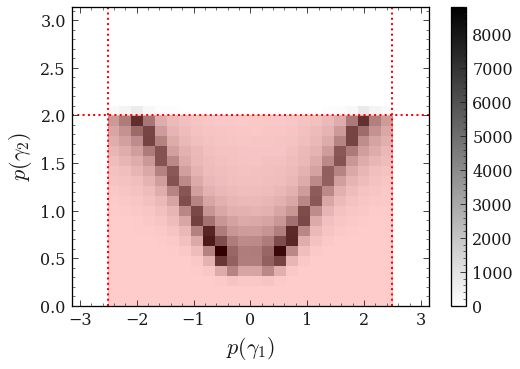

In [73]:
xvar = 'Eta_1_daughterDiffOfPhi_0_1'
yvar = 'Eta_1_daughterAngle_0_1'

x1=D0etaeta_gg_false[xvar]
y1=D0etaeta_gg_false[yvar]


px = 1/plt.rcParams['figure.dpi']

xrange = (-pi,pi,31)
yrange = (0,pi,31)

# plt.figure(figsize=(576*px, 396*px))

ybins = np.linspace(*yrange)
xbins = np.linspace(*xrange)
plt.hist2d(x1, y1, bins=(xbins,ybins), cmap=plt.cm.binary)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
# plot_title=r"True,$D^0 \rightarrow \eta \eta$"

# plt.title(plot_title)
ax = plt.gca()
ylabel = r"$p(\gamma_2)$"
xlabel = r"$p(\gamma_1)$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
plt.axvline(x = 2.5, color = 'r',ls=':', lw=2)
plt.axvline(x = -2.5, color = 'r',ls=':', lw=2)
plt.axhline(y=2, color='r', ls=':', lw=2)
plt.fill_between([-2.5, 2.5], 2, alpha=0.2, color='red')

# plt.annotate('', xy=(0.6,2.0),xytext=(0.90,2.0), arrowprops=dict(facecolor='red'))
plt.colorbar()
plt.show()

## Eta_1_daughterDiffOfPhi_0_1

In [24]:
import math
pi = math.pi

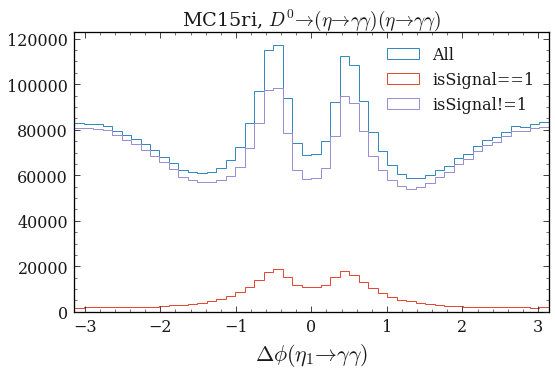

In [18]:
xrange = (-pi,pi,51)
xm = np.linspace(*xrange)
var = 'Eta_1_daughterDiffOfPhi_0_1'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etaeta_gg_1M_Eta1diffphi_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$\Delta \phi(\eta_1\to \gamma \gamma)\;$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



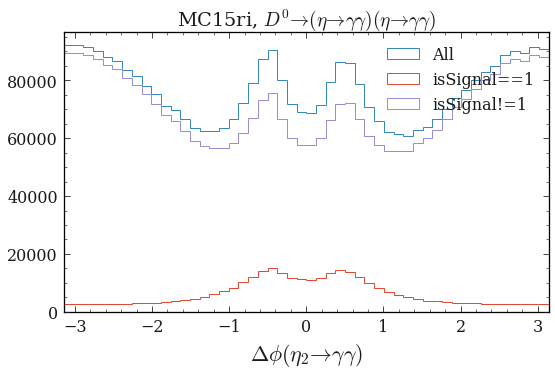

In [19]:
xrange = (-pi,pi,51)
xm = np.linspace(*xrange)
var = 'Eta_2_daughterDiffOfPhi_0_1'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etaeta_gg_1M_Eta2diffphi_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$\Delta \phi(\eta_2\to \gamma \gamma)\;$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(file_path)



## Eta_1_daughterAngle_0_1

In [19]:
import math
pi = math.pi

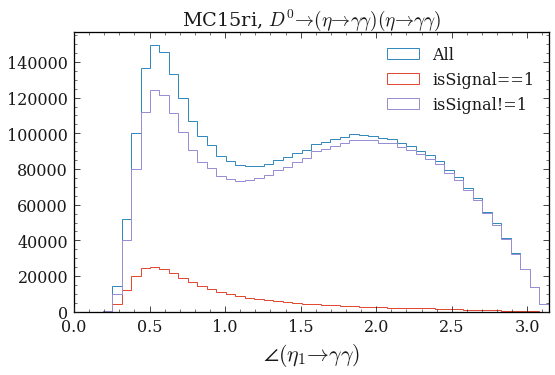

In [20]:
xrange = (0,pi,51)
xm = np.linspace(*xrange)
var = 'Eta_1_daughterAngle_0_1'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etaeta_gg_1M_Eta1daughterangle_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$ \angle(\eta_1\to \gamma \gamma)\;$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



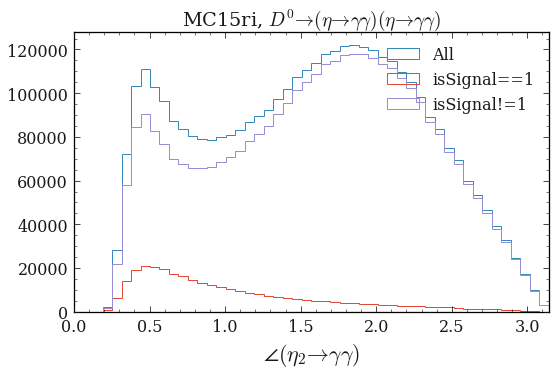

In [21]:
xrange = (0,pi,51)
xm = np.linspace(*xrange)
var = 'Eta_2_daughterAngle_0_1'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etaeta_gg_1M_Eta2daughterangle_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$ \angle(\eta_2\to \gamma \gamma)\;$'

ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(file_path)



## Eta_Easym

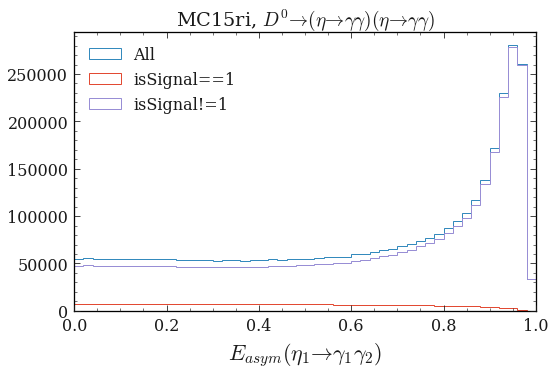

In [22]:
xrange = (0,1,51)
xm = np.linspace(*xrange)
var = 'Eta_1_Easym'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etaeta_gg_1M_Eta1Easym_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$ E_{asym}(\eta_1\to \gamma_1 \gamma_2)\;$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig(file_path)



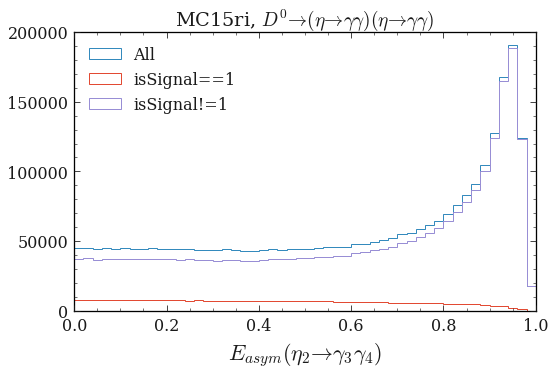

In [43]:
xrange = (0,1,51)
xm = np.linspace(*xrange)
var = 'Eta_1_Easym'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etaeta_gg_1M_Eta1Easym_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$ E_{asym}(\eta_2\to \gamma_3 \gamma_4)\;$'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig(file_path)



## gamma1_p, gamma2_p 2d

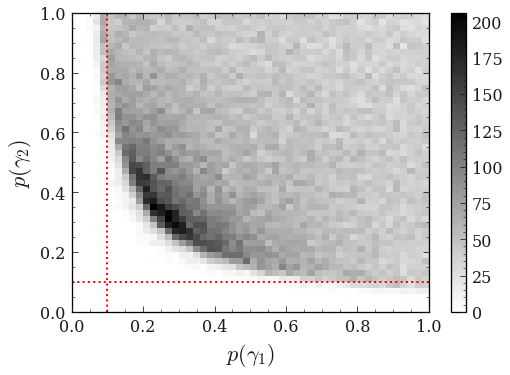

In [23]:
xvar = 'gamma1_p'
yvar = 'gamma2_p'

x1=D0etaeta_gg_true[xvar]
y1=D0etaeta_gg_true[yvar]


px = 1/plt.rcParams['figure.dpi']

xrange = (0,1,51)

# plt.figure(figsize=(576*px, 396*px))

ybins = np.linspace(*xrange)
xbins = np.linspace(*xrange)
plt.hist2d(x1, y1, bins=(xbins,ybins), cmap=plt.cm.binary)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
# plot_title=r"True,$D^0 \rightarrow \eta \eta$"

# plt.title(plot_title)
ax = plt.gca()
ylabel = r"$p(\gamma_2)$"
xlabel = r"$p(\gamma_1)$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
plt.axvline(x = 0.1, color = 'r',ls=':', lw=2)
plt.axhline(y=0.1, color='r', ls=':', lw=2)
# plt.annotate('', xy=(0.6,2.0),xytext=(0.90,2.0), arrowprops=dict(facecolor='red'))
plt.colorbar()
plt.show()

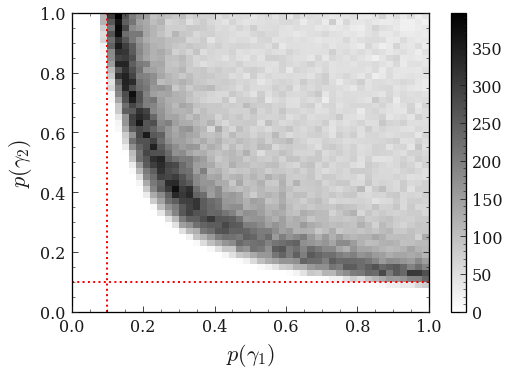

In [80]:
xvar = 'gamma1_p'
yvar = 'gamma2_p'

x1=D0etaeta_gg_false[xvar]
y1=D0etaeta_gg_false[yvar]


px = 1/plt.rcParams['figure.dpi']

xrange = (0,1,51)

# plt.figure(figsize=(576*px, 396*px))

ybins = np.linspace(*xrange)
xbins = np.linspace(*xrange)
plt.hist2d(x1, y1, bins=(xbins,ybins), cmap=plt.cm.binary)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.BuPu)

#plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.Greys)

# plot_title=r"$D^0 \rightarrow K_S^0 \pi^0$"
# plot_title=r"$D^0 \rightarrow \bar{K}^{*0} \pi^0$"

# plt.title(plot_title)
ax = plt.gca()
ylabel = r"$p(\gamma_2)$"
xlabel = r"$p(\gamma_1)$"
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
plt.axvline(x = 0.1, color = 'r',ls=':', lw=2)
plt.axhline(y=0.1, color='r', ls=':', lw=2)
# plt.annotate('', xy=(0.6,2.0),xytext=(0.90,2.0), arrowprops=dict(facecolor='red'))
plt.colorbar()
plt.show()

## gamma_p (1,2,3,4)

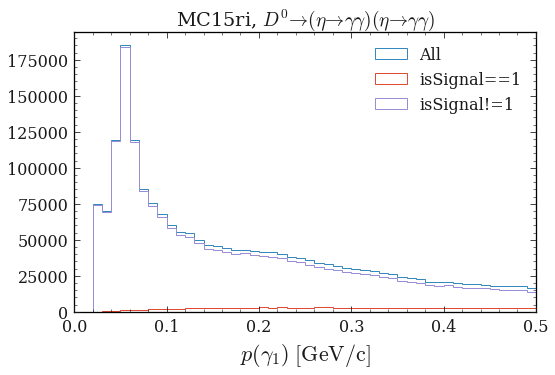

In [24]:
xrange = (0,0.5,51)
xm = np.linspace(*xrange)
var = 'gamma1_p'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etaeta_gg_1M_gamma1_p_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$ p(\gamma_1) \; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



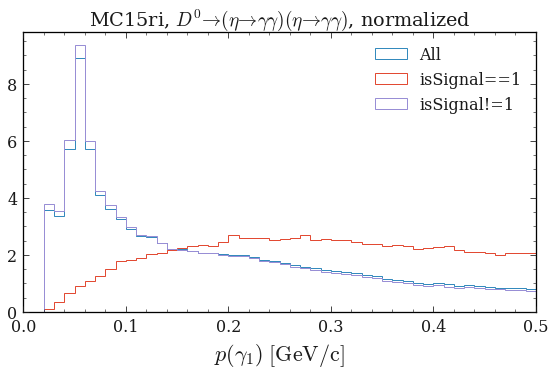

In [25]:
xrange = (0,0.5,51)
xm = np.linspace(*xrange)
var = 'gamma1_p'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$, normalized'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etaeta_gg_1M_gamma1_p_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step', density=True) 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step', density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$ p(\gamma_1) \; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



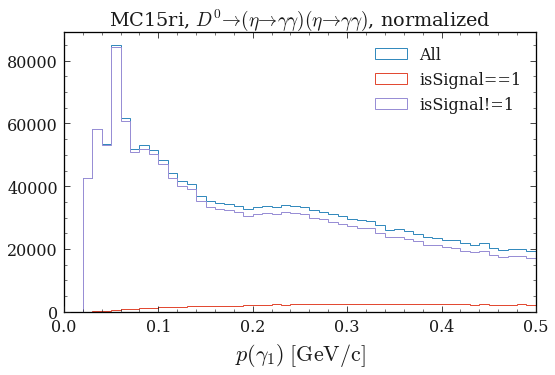

In [26]:
xrange = (0,0.5,51)
xm = np.linspace(*xrange)
var = 'gamma2_p'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$, normalized'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etaeta_gg_1M_gamma1_p_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$ p(\gamma_1) \; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



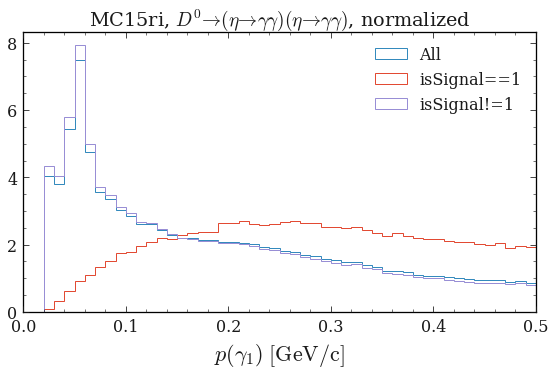

In [27]:
xrange = (0,0.5,51)
xm = np.linspace(*xrange)
var = 'gamma3_p'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$, normalized'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etaeta_gg_1M_gamma1_p_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step', density=True) 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step', density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$ p(\gamma_1) \; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



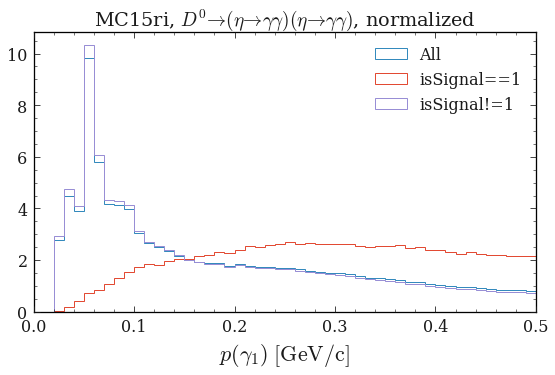

In [28]:
xrange = (0,0.5,51)
xm = np.linspace(*xrange)
var = 'gamma4_p'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$, normalized'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etaeta_gg_1M_gamma1_p_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step', density=True) 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step', density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$ p(\gamma_1) \; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



## gamma1_p among clusterReg

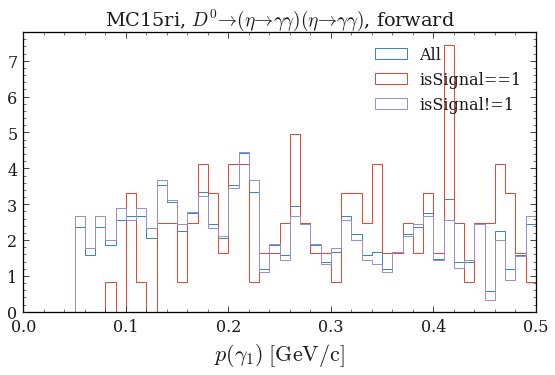

In [29]:
xrange = (0,0.5,51)
xm = np.linspace(*xrange)
var = 'gamma1_p'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$, forward'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etaeta_gg_1M_gamma1_p_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg.query('gamma1_clusterReg==1')[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(D0etaeta_gg_true.query('gamma1_clusterReg==1')[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(D0etaeta_gg_false.query('gamma1_clusterReg==1')[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$ p(\gamma_1) \; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



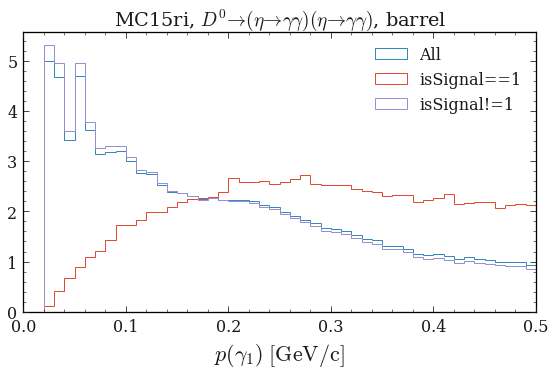

In [30]:
xrange = (0,0.5,51)
xm = np.linspace(*xrange)
var = 'gamma1_p'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$, barrel'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etaeta_gg_1M_gamma1_p_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg.query('gamma1_clusterReg==2')[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(D0etaeta_gg_true.query('gamma1_clusterReg==2')[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(D0etaeta_gg_false.query('gamma1_clusterReg==2')[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$ p(\gamma_1) \; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



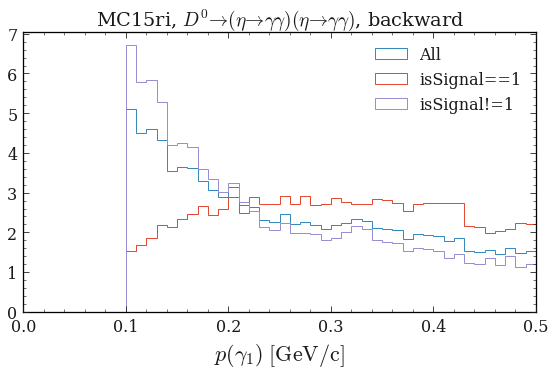

In [114]:
xrange = (0,0.5,51)
xm = np.linspace(*xrange)
var = 'gamma1_p'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$, backward'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etaeta_gg_1M_gamma1_p_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg.query('gamma1_clusterReg==3')[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(D0etaeta_gg_true.query('gamma1_clusterReg==3')[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(D0etaeta_gg_false.query('gamma1_clusterReg==3')[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$ p(\gamma_1) \; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



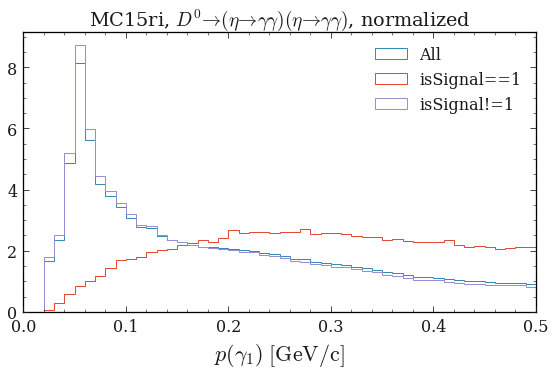

In [54]:
xrange = (0,0.5,51)
xm = np.linspace(*xrange)
var = 'gamma1_p'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$, normalized'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etaeta_gg_1M_gamma1_p_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step', density=True) 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step', density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$ p(\gamma_1) \; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



## gamma1 clusterNHits

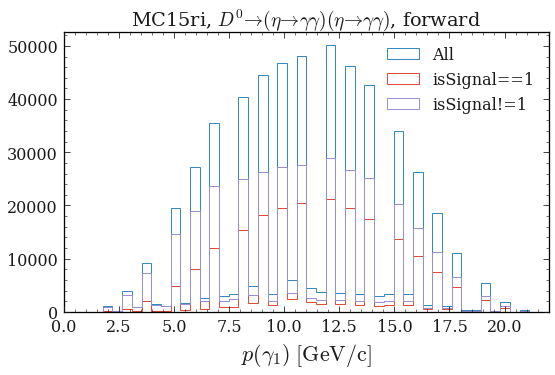

In [118]:
xrange = (0,22,51)
xm = np.linspace(*xrange)
var = 'gamma1_clusterNHits'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$, forward'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

file_path=img_path + '/mc15ri_etaeta_gg_1M_gamma1_p_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$ p(\gamma_1) \; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



## gamma1_thetaInCDCAcceptance

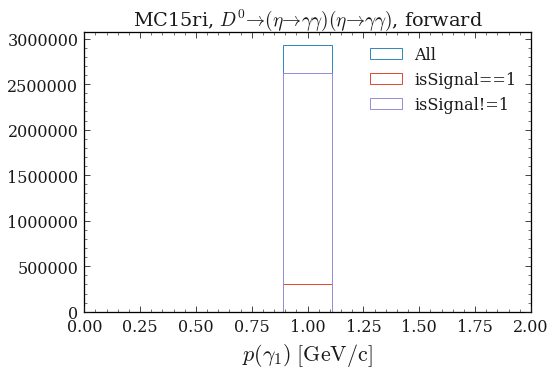

In [12]:

xrange = (0,2,10)
xm = np.linspace(*xrange)
var = 'gamma1_thetaInCDCAcceptance'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \gamma \gamma)$, forward'
# img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gg'

# file_path=img_path + '/mc15ri_etaeta_gg_1M_gamma1_p_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$ p(\gamma_1) \; [\mathrm{GeV/c}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)

# D0 -> (eta -> gg) (eta -> pi+ pi- pi0)

In [10]:
file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dtoetaeta_gg_pipipi/pre_cut_study/'
file += 'pre_cut_*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter=' D0_M>0'

tree = 'etaeta_gpi_tag'
variables = ['D0_M','Dstarp_isSignal']

D0etaeta_gpi   = get_pd(file=file , tree=tree, variables=variables ,base_filter=base_filter)
D0etaeta_gpi_true = D0etaeta_gpi.query('Dstarp_isSignal==1')
D0etaeta_gpi_false = D0etaeta_gpi.query('Dstarp_isSignal!=1')


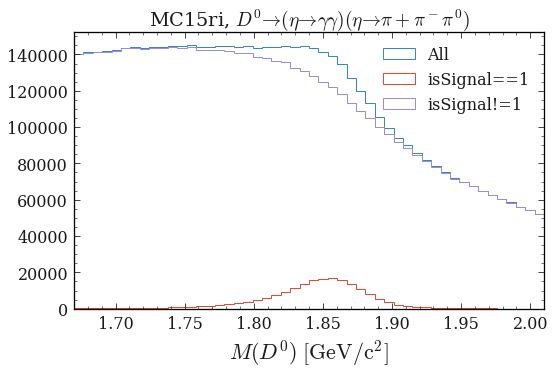

In [11]:
xrange = (1.67,2.01,51)
xm = np.linspace(*xrange)
var = 'D0_M'
plot_title = r'MC15ri, $D^0 \to (\eta \to \gamma \gamma) (\eta \to \pi+ \pi^- \pi^0)$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_gpi'
file_path=img_path + '/mc15ri_etaeta_gpi_1M_D0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_gpi[var], label='All',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gpi_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(D0etaeta_gpi_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(D^0)\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(file_path)



# D0 -> (eta -> pi+ pi- pi0) (eta -> pi+ pi- pi0)

In [4]:
file = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dtoetaeta_pipipi_pipipi/pre_cut_study/'
file += 'pre_cut_*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter=' D0_M>0'

tree = 'etaeta_pipi_tag'
variables = ['D0_M','Dstarp_isSignal',\
            'Eta_1_M','Eta_2_M']

D0etaeta_pipi   = get_pd(file=file , tree=tree, variables=variables ,base_filter=base_filter)
D0etaeta_pipi_true = D0etaeta_pipi.query('Dstarp_isSignal==1')
D0etaeta_pipi_false = D0etaeta_pipi.query('Dstarp_isSignal!=1')


## D0M

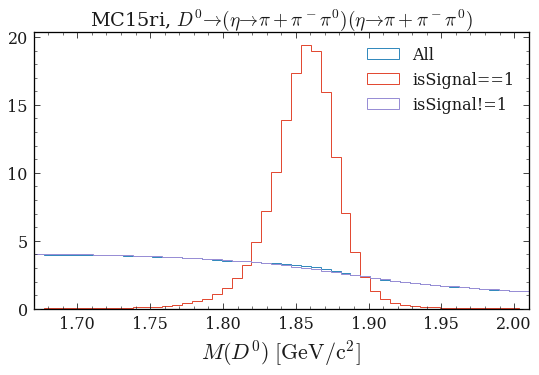

In [7]:
xrange = (1.67,2.01,51)
xm = np.linspace(*xrange)
var = 'D0_M'
plot_title = r'MC15ri, $D^0 \to (\eta \to \pi+ \pi^- \pi^0) (\eta \to \pi+ \pi^- \pi^0)$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_pipi'
file_path=img_path + '/mc15ri_etaeta_pipi_1M_D0M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_pipi[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(D0etaeta_pipi_true[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(D0etaeta_pipi_false[var], label='isSignal!=1',bins=xm,  histtype='step',density=True) 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(D^0)\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)



# Eta M

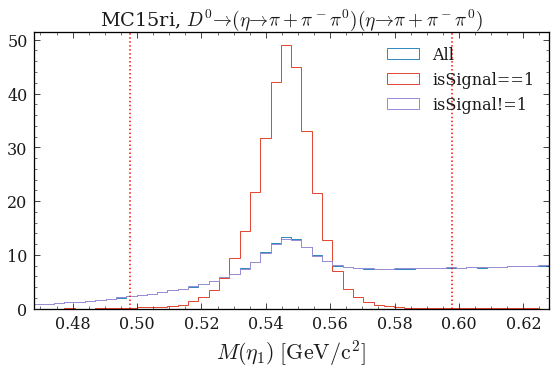

In [5]:
xrange = (0.54786-0.08,0.54786+0.08,51)
xm = np.linspace(*xrange)
var = 'Eta_1_M'
plot_title = r'MC15ri, $D^0 \to (\eta \to \pi+ \pi^- \pi^0) (\eta \to \pi+ \pi^- \pi^0)$'
img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/D0etaeta_pipi'
file_path=img_path + '/mc15ri_etaeta_pipi_1M_Eta1M_precut_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(D0etaeta_pipi[var], label='All',bins=xm,  histtype='step',density=True) 
plt.hist(D0etaeta_pipi_true[var], label='isSignal==1',bins=xm,  histtype='step',density=True) 
plt.hist(D0etaeta_pipi_false[var], label='isSignal!=1',bins=xm,  histtype='step',density=True)

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(\eta_1)\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.axvline(x=0.54786-0.05,  color='red', linestyle='dotted')
plt.axvline(x=0.54786+0.05,  color='red', linestyle='dotted')

#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)

